### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.options.display.max_columns= None
pd.options.display.max_colwidth= None
pd.options.display.max_rows = None

### Import Data

In [3]:
# df_mixed = pd.read_excel('df_mixed_with_second_model.xlsx')
# df_neg = pd.read_excel('df_neg_with_second_model_Hamrah_Bank_limit.xlsx')
# df_veryneg = pd.read_excel('df_veryneg_with_second_model_Hamrah_Bank_limit.xlsx')
# df_verypos = pd.read_excel('df_verypos_with_second_model.xlsx')
# df_pos = pd.read_excel('df_pos_with_second_model.xlsx')
# df_non = pd.read_excel('df_non_with_second_model.xlsx')
# df_mixed.drop('Unnamed: 0',axis=1, inplace=True)
# df_neg.drop('Unnamed: 0',axis=1, inplace=True)
# df_veryneg.drop('Unnamed: 0',axis=1, inplace=True)
# df_pos.drop('Unnamed: 0',axis=1, inplace=True)
# df_verypos.drop('Unnamed: 0',axis=1, inplace=True)
# df_non.drop('Unnamed: 0',axis=1, inplace=True)

# name= 'MegaBank'
# name = 'Hamrah_Bank'
# name = 'Bajet'
# name = 'Bale'
name = 'Bankino'
# name = 'Blu'
# name ='Wepod'

# Define the path to the Excel file
# file_name = '\\mega bank\\df_all_with_second_model_MegaBank_mordad.xlsx'
file_name1 = f'\\{name}\\df_neg_with_second_model_{name}_mordad.xlsx'
file_path1 = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis'+file_name1

file_name2 = f'\\{name}\\df_veryneg_with_second_model_{name}_mordad.xlsx'
file_path2 = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis'+file_name2
# Read the Excel file
df_neg = pd.read_excel(file_path1)
df_veryneg = pd.read_excel(file_path2)




df = pd.concat([df_neg,df_veryneg])
df.reset_index(inplace=True, drop=True)
df.drop('Unnamed: 0',axis=1, inplace=True)


# df = df[:1000] # bankino


df.tail(15)

,comment,rating,year,month,day,General sentiment
938,اصلا براچی کد ملی میخواد مگه میخواهیم ثبت نام کنیم اصلا بدرد نمیخوره الکی اینترنت رو از دست ندید,2,1400,3,14,very negative
939,چرا نمیتونم شارژ بخرم ؟!! گزینه ش کو😐,2,1400,2,19,very negative
940,مشخصات زیادی میگیره و آخرش ۵۰ تومن کارمزد باز کردن حساب. بلوبانک سامان مجانی حساب و کارت میده و ۱۲۰ تومن هدیه! واقعا چرا اینو نصب کنید؟,1,1400,2,15,very negative
941,رمز ورود به نرم افزار کاراکترهای خاص رو قبول نمیکنه . یه ضعف بزرگ برای یه نرم افزار بانکی,1,1400,1,16,very negative
942,من بیست روزه ثبت نام رو تکمیل کرده ام ام هنوز شماره کارت ورمزش نیامده خیلی مسخر ه اس من از آلمان چیزی سفارش دادم رسید دستم اما اینا هنوز,2,1399,11,19,very negative
943,خیلی مشکل داره ۴ بار آدرسمو تغیر دادم ولی بازم قبول نمیکنه آدرسم میگه اشتباهه با اینکه همزمان تو ۳تا بانک دیگه آنلاین بون مشکل حساب باز کردم,1,1399,11,5,very negative
944,اصلا بدرد نمی خوره ۱۰ روز مدارک فرستادم هنوزم جوابش نیومد.مگه چقدر زمان لامه؟,1,1399,10,20,very negative
945,چرا برای ساکنین شهرستان ها افتتاح حساب انجام نمیشه؟!!!,2,1399,10,18,very negative
946,بدرد نمیخوره,1,1399,9,24,very negative
947,والا چند هقته شده و نه چیزی رو اطلاع میدن و نه خبری از کارت هست,3,1402,10,6,very negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment            953 non-null    object
 1   rating             953 non-null    int64 
 2   year               953 non-null    int64 
 3   month              953 non-null    int64 
 4   day                953 non-null    int64 
 5   General sentiment  953 non-null    object
dtypes: int64(4), object(2)
memory usage: 44.8+ KB


In [5]:
# for bankino
df.sort_values(['year','month','day'],inplace=True, ascending= True)
df= df[df['year']>=1402]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 549 to 5
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment            459 non-null    object
 1   rating             459 non-null    int64 
 2   year               459 non-null    int64 
 3   month              459 non-null    int64 
 4   day                459 non-null    int64 
 5   General sentiment  459 non-null    object
dtypes: int64(4), object(2)
memory usage: 25.1+ KB


In [6]:
df.head()

,comment,rating,year,month,day,General sentiment
549,چرا میگه عدم دسترسی به سرور؟آخرین نسخه رو هم دارم,1,1402,1,1,negative
771,اینکه امتیاز ها رو ۶ ماه به ۶ ماه میسوزونید خیلی بده من تا سقف اعتبار ۵ میلیون باز کردم اما این ماه اعتبارم شد ۱ میلیون این خیلی بده,2,1402,1,5,very negative
251,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,5,1402,1,7,negative
780,چرا هنوز کارت من نیومده ؟؟برای همکارام دو روزه اومده ولی برای من ۱۰ روزه ک نیومده,3,1402,1,7,very negative
250,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,3,1402,1,8,negative


In [7]:
print(df.columns)

Index(['comment', 'rating', 'year', 'month', 'day', 'General sentiment'], dtype='object')


In [8]:
len(df)

459

## Preprocessing

In [9]:
def _multiple_replace(mapping, text):
    pattern = "|".join(map(re.escape, mapping.keys()))
    return re.sub(pattern, lambda m: mapping[m.group()], str(text))

def convert_fa_numbers(input_str):
    mapping = {
        '۰': '0',
        '۱': '1',
        '۲': '2',
        '۳': '3',
        '۴': '4',
        '۵': '5',
        '۶': '6',
        '۷': '7',
        '۸': '8',
        '۹': '9',
        '.': '.',
    }
    return _multiple_replace(mapping, input_str)

def convert_en_numbers(input_str):
    mapping = {
         '0': '۰',
         '1' : '۱',
         '2' :'۲',
        '3'  :'۳',
        '4'  :'۴',
        '5' :'۵',
        '6' :'۶',
        '7' :'۷',
        '8' :'۸',
        '9' :'۹',
        '.' :'.'
    }
    return _multiple_replace(mapping, input_str)

def convert_ar_characters(input_str):
    """
    Converts Arabic chars to related Persian unicode char
    :param input_str: String contains Arabic chars
    :return: New str with converted arabic chars
    """
    mapping = {
        'ك': 'ک',
        'ى': 'ی',
        'ي': 'ی',
        'ئ':'ی',
        'إ':'ا',
        'أ':'ا',
        'ة':'ه',
        'ؤ':'و'
    }
    return _multiple_replace(mapping, input_str)

def preprocess(text):
    text = convert_fa_numbers(text)
    text = convert_ar_characters(text)
    text = text.strip()
    removelist = "<>"
    # text = re.sub(r'[^\w'+removelist+']', ' ', text)
    # text = re.sub(r'[^\w]', ' ', text)
    # text = re.sub(r'((#)[\w]*)','#',text)
    text = text.replace('\u200c', ' ')
    text = re.sub(r'[\s]{2,}', ' ', text)
    text = re.sub(r'(\w)\1{2,}', r'\1\1',text)
    text = re.sub(r' [\d+]', ' ',text)
    text = re.sub(r'[^\w]', ' ',text)
    text = convert_en_numbers(text)
    text = re.sub(r'[\d]+',' ',text)
    text = convert_ar_characters(text)
    # remove punctuations
    text= re.sub(r'[^\w]', ' ', text)
    return(text)

In [10]:
# applyinig preprocess function on text
df['preprocess_comment'] = df['comment'].apply(lambda x: preprocess(x))

In [11]:
# removing name column for security reason
df.head(10)

,comment,rating,year,month,day,General sentiment,preprocess_comment
549,چرا میگه عدم دسترسی به سرور؟آخرین نسخه رو هم دارم,1,1402,1,1,negative,چرا میگه عدم دسترسی به سرور آخرین نسخه رو هم دارم
771,اینکه امتیاز ها رو ۶ ماه به ۶ ماه میسوزونید خیلی بده من تا سقف اعتبار ۵ میلیون باز کردم اما این ماه اعتبارم شد ۱ میلیون این خیلی بده,2,1402,1,5,very negative,اینکه امتیاز ها رو ماه به ماه میسوزونید خیلی بده من تا سقف اعتبار میلیون باز کردم اما این ماه اعتبارم شد میلیون این خیلی بده
251,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,5,1402,1,7,negative,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید
780,چرا هنوز کارت من نیومده ؟؟برای همکارام دو روزه اومده ولی برای من ۱۰ روزه ک نیومده,3,1402,1,7,very negative,چرا هنوز کارت من نیومده برای همکارام دو روزه اومده ولی برای من روزه ک نیومده
250,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,3,1402,1,8,negative,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون
249,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید,1,1402,1,10,negative,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید
779,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه هم پشتیبانی پاسخ درستی نمیدن حالا من موندم و بدهی شرکت,1,1402,1,10,very negative,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه هم پشتیبانی پاسخ درستی نمیدن حالا من موندم و بدهی شرکت
778,کارتش اصلا خوب نبود,5,1402,1,12,very negative,کارتش اصلا خوب نبود
548,بد,1,1402,1,15,negative,بد
248,برنامه خوبیه من مدتی است باهاش کار میکنم وام خم گرفتم خوب ب‌ود .یم ضعف داره اونم کیفیت پائین کارت هست بخاطر همین من از کارت برای خرید استفاده نمی‌کنم.و فقط از خدمات اینترنتی میشه استفاده کرد,5,1402,1,16,negative,برنامه خوبیه من مدتی است باهاش کار میکنم وام خم گرفتم خوب ب ود یم ضعف داره اونم کیفیت پایین کارت هست بخاطر همین من از کارت برای خرید استفاده نمی کنم و فقط از خدمات اینترنتی میشه استفاده کرد


### Remove Stopwords

In [12]:
# ## using tf-idf to find more stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()

# vectors = vectorizer.fit_transform(df['preprocess_comment'])

# feature_names = vectorizer.get_feature_names()

# dense = vectors.todense()
# denselist = dense.tolist()
# df_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [13]:
# df_tfidf.sum().sort_values(ascending=False)

In [14]:
# import os

# path = "D:\Digital Evolution\Text Mining_ Mega Bank"

# # Check current working directory.
# retval = os.getcwd()

# print ("Current working directory %s" % retval)

# # Now change the directory
# os.chdir( path )

# # Check current working directory.
# retval = os.getcwd()

# print( "Directory changed successfully %s" % retval)

In [15]:
## Adding new stopwords with general one. The complete file is 'stopwords3'

# with open('stopwords3.txt','r', encoding = 'utf-8') as st:
# with new stopwords
# with open('stopwords_neg_ mega_2model.txt','r', encoding = 'utf-8') as st:
stop_path = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis\\stopwords\\'
with open(stop_path + 'Dec_stopwords_neg.txt','r', encoding = 'utf-8') as st:
    t = st.readlines()
    stp = [i.strip() for i in t]
    stopwords = set(stp)
    


# with open('Dec_stopwords_neg.txt','r', encoding = 'utf-8') as st:
#     t = st.readlines()
#     stp = [i.strip() for i in t]
#     stopwords = set(stp)

In [16]:
stopwords

{'.',
 'آخر',
 'آخرش',
 'آخه',
 'آره',
 'آمد',
 'آمده',
 'آن',
 'آن ها',
 'آنها',
 'آیا',
 'احتمالا',
 'ادامه',
 'اره',
 'از',
 'ازش',
 'است',
 'استفاده',
 'اسم',
 'اش',
 'اصلا',
 'اضافه',
 'افتاد',
 'افتاده',
 'افزار',
 'الان',
 'البته',
 'ام',
 'اما',
 'امروز',
 'امشب',
 'ان',
 'انجام',
 'اند',
 'اندازه',
 'انقد',
 'انقدر',
 'انگار',
 'او',
 'اول',
 'اولین',
 'اومد',
 'اومده',
 'اون',
 'اون ها',
 'اونا',
 'اونایی',
 'اونجا',
 'اونم',
 'اونها',
 'اونی',
 'اين',
 'اکنون',
 'اگر',
 'اگه',
 'ای',
 'ایشون',
 'ایم',
 'این',
 'این ها',
 'اینا',
 'اینجا',
 'اینجوری',
 'اینقدر',
 'اینم',
 'اینه',
 'اینها',
 'اینو',
 'اینکه',
 'با',
 'بابت',
 'بار',
 'باز',
 'بازم',
 'بازگردند',
 'باش',
 'باشد',
 'باشم',
 'باشه',
 'باشی',
 'باشید',
 'باشیم',
 'باعث',
 'بالا',
 'بالاخره',
 'بانک',
 'بانکی',
 'باید',
 'ببین',
 'ببینید',
 'بخاطر',
 'بخیر',
 'بد',
 'بدتر',
 'بدتره',
 'بدم',
 'بده',
 'بدون',
 'بدی',
 'بدید',
 'بدیم',
 'بر',
 'برا',
 'برابر',
 'براشون',
 'برای',
 'برخی',
 'برد',
 'برسه',
 'برم',
 'ب

In [17]:
len(stopwords)

484

In [18]:
## remove stop words
df['comment_no_stp']= df['preprocess_comment'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))

In [19]:
df.head(15)

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp
549,چرا میگه عدم دسترسی به سرور؟آخرین نسخه رو هم دارم,1,1402,1,1,negative,چرا میگه عدم دسترسی به سرور آخرین نسخه رو هم دارم,دسترسی سرور آخرین نسخه
771,اینکه امتیاز ها رو ۶ ماه به ۶ ماه میسوزونید خیلی بده من تا سقف اعتبار ۵ میلیون باز کردم اما این ماه اعتبارم شد ۱ میلیون این خیلی بده,2,1402,1,5,very negative,اینکه امتیاز ها رو ماه به ماه میسوزونید خیلی بده من تا سقف اعتبار میلیون باز کردم اما این ماه اعتبارم شد میلیون این خیلی بده,امتیاز میسوزونید سقف اعتبار میلیون اعتبارم میلیون
251,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,5,1402,1,7,negative,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,برنامه نصب مینویسه دستگاه قابلیت نصب برنامه پشتیبانی تماس بگیرید راهنمایی
780,چرا هنوز کارت من نیومده ؟؟برای همکارام دو روزه اومده ولی برای من ۱۰ روزه ک نیومده,3,1402,1,7,very negative,چرا هنوز کارت من نیومده برای همکارام دو روزه اومده ولی برای من روزه ک نیومده,کارت نیومده همکارام روزه روزه نیومده
250,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,3,1402,1,8,negative,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,جدیدا میخام درگاهای اینترنتی خرید رمز پویا میزنم رمز اشتباهه مغازه خرید رمز درستو دستگاه پز میزنم رمزش اشتباهه پیگیری مشکلارو برطرف
249,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید,1,1402,1,10,negative,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید,کارتم گم چجوری دوباره مجدد کارتو بگیرم راهنمایی
779,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه هم پشتیبانی پاسخ درستی نمیدن حالا من موندم و بدهی شرکت,1,1402,1,10,very negative,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه هم پشتیبانی پاسخ درستی نمیدن حالا من موندم و بدهی شرکت,فرض فضای افزاری راحتی افزاریش بهتره گردش مالی شرکت اوردم بانکینو پشیمونم میاره خطایی رخ پشتیبانی تماس بگیرین راضی نبودم خوش بختانه پشتیبانی پاسخ درستی نمیدن موندم بدهی شرکت
778,کارتش اصلا خوب نبود,5,1402,1,12,very negative,کارتش اصلا خوب نبود,کارتش خوب
548,بد,1,1402,1,15,negative,بد,
248,برنامه خوبیه من مدتی است باهاش کار میکنم وام خم گرفتم خوب ب‌ود .یم ضعف داره اونم کیفیت پائین کارت هست بخاطر همین من از کارت برای خرید استفاده نمی‌کنم.و فقط از خدمات اینترنتی میشه استفاده کرد,5,1402,1,16,negative,برنامه خوبیه من مدتی است باهاش کار میکنم وام خم گرفتم خوب ب ود یم ضعف داره اونم کیفیت پایین کارت هست بخاطر همین من از کارت برای خرید استفاده نمی کنم و فقط از خدمات اینترنتی میشه استفاده کرد,برنامه خوبیه مدتی باهاش وام خم گرفتم خوب ب ود یم ضعف کیفیت پایین کارت کارت خرید خدمات اینترنتی


In [20]:
len(df)

459

In [21]:
df_pivot = df.pivot_table(index=['year','month','General sentiment'],values=['rating'],aggfunc='count')

In [22]:
df_pivot

rating
year month General sentiment        
1402 1     negative               10
           very negative           5
     2     negative               30
           very negative          25
     3     negative               18
           very negative           9
     4     negative               39
           very negative          19
     5     negative               25
           very negative          12
     6     negative               25
           very negative          16
     7     negative                9
           very negative          13
     8     negative               16
           very negative          11
     9     negative               11
           very negative           6
     10    negative               18
           very negative          16
     11    negative               10
           very negative           6
     12    negative               26
           very negative          19
1403 1     negative               10
           very negative          14
     2     negative                8
           very negative           8
     3     negative                5
           very negative           8
     4     negative                8
           very negative           3
     5     negative                1

In [23]:
df_melt = df_pivot.copy()
df_melt.reset_index(inplace=True)
df_melt

,year,month,General sentiment,rating
0,1402,1,negative,10
1,1402,1,very negative,5
2,1402,2,negative,30
3,1402,2,very negative,25
4,1402,3,negative,18
5,1402,3,very negative,9
6,1402,4,negative,39
7,1402,4,very negative,19
8,1402,5,negative,25
9,1402,5,very negative,12


Text(0.5, 0, 'year')

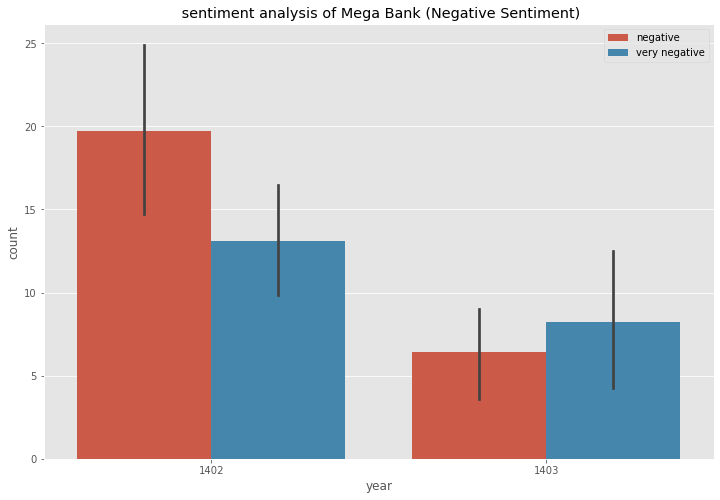

In [24]:
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
# sns.plot(data=tabel1, x=sum_install , y='Month_bidi')
sns.barplot(x='year', y='rating',hue='General sentiment', data=df_melt)
plt.ylabel('count')
plt.legend()
plt.title(' sentiment analysis of Mega Bank (Negative Sentiment)')
plt.xlabel('year')

# limitation

In [25]:
df_neg_limited = df[((df['General sentiment']=='very negative') &
                                    (df['rating']<6) &
 (df['year']==1402) & (df['month']>4)) |
             ((df['General sentiment']=='negative') & (df['rating']<6) &
 (df['year']==1402) & (df['month']>4))]

df_neg_limited

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp
164,یه جوری اومدید تبلیغ کردید که نگران نباشید راحت میتونید وام بگیرید آخه دوست گرامی چندین ماه باید تو این حساب باید اول کار بکنیم تازه بعد ده تومن می‌خوابید وام بدید برای هر یه میلیون صد هزار تومن خودتون خجالتتون نمیگیره از این آپشن هایی که گذاشتید به نظر شما کسی گیر باشه میاد ۶ ماه اول کار میکنه؟,2,1402,5,1,negative,یه جوری اومدید تبلیغ کردید که نگران نباشید راحت میتونید وام بگیرید آخه دوست گرامی چندین ماه باید تو این حساب باید اول کار بکنیم تازه بعد ده تومن می خوابید وام بدید برای هر یه میلیون صد هزار تومن خودتون خجالتتون نمیگیره از این آپشن هایی که گذاشتید به نظر شما کسی گیر باشه میاد ماه اول کار میکنه,اومدید تبلیغ نگران راحت میتونید وام بگیرید دوست گرامی چندین حساب بکنیم تازه خوابید وام میلیون خجالتتون نمیگیره آپشن گذاشتید نظر گیر
165,سلام مدتی هست برنامه بانکینو بازنمیشه,5,1402,5,1,negative,سلام مدتی هست برنامه بانکینو بازنمیشه,مدتی برنامه بانکینو بازنمیشه
163,از یه همچین بانکی با این اسم تعجب هست که وام صد هزار تومانی دارد .,1,1402,5,2,negative,از یه همچین بانکی با این اسم تعجب هست که وام صد هزار تومانی دارد,همچین تعجب وام تومانی
162,با سلام بنده برج ۱۰ پارسال افتحاح حساب کردم و زمان انتخاب رنگ کارت جز مشکی هیچ گزینه دیگری نبود حالا اینجا خواندم گویا رنگ سفید هم داره پس چرا صدور کارت سفید رو حذف کردید از انتخاب کارتها ؟🌹,5,1402,5,3,negative,با سلام بنده برج پارسال افتحاح حساب کردم و زمان انتخاب رنگ کارت جز مشکی هیچ گزینه دیگری نبود حالا اینجا خواندم گویا رنگ سفید هم داره پس چرا صدور کارت سفید رو حذف کردید از انتخاب کارتها,بنده برج پارسال افتحاح حساب زمان انتخاب رنگ کارت مشکی هیچ گزینه دیگری خواندم گویا رنگ سفید صدور کارت سفید حذف انتخاب کارتها
539,افتضاحه,1,1402,5,4,negative,افتضاحه,افتضاحه
161,سلام کارت من مفقود شده چجوری میتونم دوباره کارت صادر کنم پاسخ بدید لطفا؟؟,1,1402,5,7,negative,سلام کارت من مفقود شده چجوری میتونم دوباره کارت صادر کنم پاسخ بدید لطفا,کارت مفقود چجوری میتونم دوباره کارت صادر پاسخ
716,داغون,1,1402,5,7,very negative,داغون,داغون
160,ساعت 1 شب پول انتقال دادم به کارت بانکینو خودم، میبینم موجودیش صفره!به پشتیبانی پیام دادم میگه از ۱۲تا۲ شب در حال بروزرسانی سیستم بانک بعد ۲میاد به حساب .حالا شما فکر کن ساعت ۱۲ شب یجا گیر کردی فقط یه کارت بانکینو همراهته و از کسی درخواست پول میکنی باید وایسی ۲شب بشه بعد درخواست کنی.این نئو بانکه؟,1,1402,5,9,negative,ساعت شب پول انتقال دادم به کارت بانکینو خودم میبینم موجودیش صفره به پشتیبانی پیام دادم میگه از تا شب در حال بروزرسانی سیستم بانک بعد میاد به حساب حالا شما فکر کن ساعت شب یجا گیر کردی فقط یه کارت بانکینو همراهته و از کسی درخواست پول میکنی باید وایسی شب بشه بعد درخواست کنی این نیو بانکه,ساعت شب پول انتقال کارت بانکینو میبینم موجودیش صفره پشتیبانی پیام شب بروزرسانی سیستم حساب فکر ساعت شب یجا گیر کارت بانکینو همراهته پول وایسی شب نیو بانکه
715,خیلی ضعف داره لطفا استفاده برنامه با فیلتر شکنم درست کنید امکان شارژ مستقیمم اضافه کنید,2,1402,5,10,very negative,خیلی ضعف داره لطفا استفاده برنامه با فیلتر شکنم درست کنید امکان شارژ مستقیمم اضافه کنید,ضعف برنامه فیلتر شکنم امکان شارژ مستقیمم
714,هر یک میلیون یک ماه یک امتیاز یعنی ده ماه ده میلیون تو حساب بخوابه ده میلیون وام میده قشنگ مسخره کردین,1,1402,5,11,very negative,هر یک میلیون یک ماه یک امتیاز یعنی ده ماه ده میلیون تو حساب بخوابه ده میلیون وام میده قشنگ مسخره کردین,میلیون امتیاز میلیون حساب بخوابه میلیون وام قشنگ مسخره کردین


In [26]:
df_neg_limited.shape

(239, 8)

In [27]:
df_neg_limited.to_excel("df_negative_limit time_megabank.xlsx")

### Using Wordcloud-fa for visualizing results

In [28]:
!pip install wordcloud-fa

In [29]:
from wordcloud_fa import WordCloudFa

In [30]:
wordcloud = WordCloudFa()

In [31]:
wordcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wordcloud.generate(' '.join(df['comment_no_stp'].tolist()))
image = wc.to_image()
image.show()
image.save(f'topwords_wordcloud_{name}.png')

### Calculating the number of words

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
        vec=CountVectorizer().fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

In [33]:
common_words = get_top_n_words(df['comment_no_stp'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head(20)

,Review,count
0,کارت,147
1,وام,125
2,برنامه,106
3,حساب,94
4,امتیاز,52
5,میلیون,38
6,بانکینو,34
7,پیامک,33
8,افتتاح,29
9,نام,29


In [34]:
# using arabic reshaper for correcting bar plot figures
!pip install --upgrade arabic-reshaper

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 203, in wrapper
    return func(self, options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 315, in run
    requirement_set = resolver.resolve(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 94, in resolve
    result = self._result = resolver.resolve(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 472, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 341, in resolve
    self._add_to_criteria(self.state.criteria, r, parent=None)
  Fi

In [35]:
!pip install python-bidi

In [36]:
import arabic_reshaper
from bidi.algorithm import get_display
 
def bidi(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

In [37]:
df1['review'] = df1['Review'].apply(lambda x: bidi(x))

In [38]:
# df1.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Words Frequency",
# )

In [39]:
##########

### Using N-Gram

In [40]:
def get_top_n_bigram(corpus, n=None, gram=2):
    vec = CountVectorizer(ngram_range=(gram,gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [41]:
## Bigram
common_words2 = get_top_n_bigram(df['comment_no_stp'], gram=2, n=30)
df2 = pd.DataFrame(common_words2, columns = ['Review', 'count'])

In [42]:
df2.head(20)

,Review,count
0,افتتاح حساب,23
1,ثبت نام,21
2,کارت کارت,15
3,کارت مشکی,11
4,احراز هویت,9
5,نسخه جدید,8
6,میلیون وام,8
7,رابط کاربری,7
8,مشکی موجود,7
9,وام میلیونی,7


In [43]:
df2['review'] = df2['Review'].apply(lambda x: bidi(x))

In [44]:
# #plotting bar plot for Bigram 
# df2.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Bigram Frequency",
# )

### Defining new function for applying N-gram in order to show wordcloud

In [45]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [46]:
## creating 2 new colunms ---> Bigram and Trigram 
df["bigram_text_wordcloud"] = df['comment_no_stp'].apply(get_ngrams, n=2)
df["trigram_text_wordcloud"] = df['comment_no_stp'].apply(get_ngrams, n=3)
df.head(20)

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp,bigram_text_wordcloud,trigram_text_wordcloud
549,چرا میگه عدم دسترسی به سرور؟آخرین نسخه رو هم دارم,1,1402,1,1,negative,چرا میگه عدم دسترسی به سرور آخرین نسخه رو هم دارم,دسترسی سرور آخرین نسخه,دسترسی_سرور سرور_آخرین آخرین_نسخه,دسترسی_سرور_آخرین سرور_آخرین_نسخه
771,اینکه امتیاز ها رو ۶ ماه به ۶ ماه میسوزونید خیلی بده من تا سقف اعتبار ۵ میلیون باز کردم اما این ماه اعتبارم شد ۱ میلیون این خیلی بده,2,1402,1,5,very negative,اینکه امتیاز ها رو ماه به ماه میسوزونید خیلی بده من تا سقف اعتبار میلیون باز کردم اما این ماه اعتبارم شد میلیون این خیلی بده,امتیاز میسوزونید سقف اعتبار میلیون اعتبارم میلیون,امتیاز_میسوزونید میسوزونید_سقف سقف_اعتبار اعتبار_میلیون میلیون_اعتبارم اعتبارم_میلیون,امتیاز_میسوزونید_سقف میسوزونید_سقف_اعتبار سقف_اعتبار_میلیون اعتبار_میلیون_اعتبارم میلیون_اعتبارم_میلیون
251,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,5,1402,1,7,negative,سلام وقت بخیر من برنامه رو نصب میکنم مینویسه دستگاه شما قابلیت نصب برنامه ندارد با پشتیبانی تماس بگیرید میشه راهنمایی ام کنید,برنامه نصب مینویسه دستگاه قابلیت نصب برنامه پشتیبانی تماس بگیرید راهنمایی,برنامه_نصب نصب_مینویسه مینویسه_دستگاه دستگاه_قابلیت قابلیت_نصب نصب_برنامه برنامه_پشتیبانی پشتیبانی_تماس تماس_بگیرید بگیرید_راهنمایی,برنامه_نصب_مینویسه نصب_مینویسه_دستگاه مینویسه_دستگاه_قابلیت دستگاه_قابلیت_نصب قابلیت_نصب_برنامه نصب_برنامه_پشتیبانی برنامه_پشتیبانی_تماس پشتیبانی_تماس_بگیرید تماس_بگیرید_راهنمایی
780,چرا هنوز کارت من نیومده ؟؟برای همکارام دو روزه اومده ولی برای من ۱۰ روزه ک نیومده,3,1402,1,7,very negative,چرا هنوز کارت من نیومده برای همکارام دو روزه اومده ولی برای من روزه ک نیومده,کارت نیومده همکارام روزه روزه نیومده,کارت_نیومده نیومده_همکارام همکارام_روزه روزه_روزه روزه_نیومده,کارت_نیومده_همکارام نیومده_همکارام_روزه همکارام_روزه_روزه روزه_روزه_نیومده
250,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,3,1402,1,8,negative,جدیدا میخام از درگاهای اینترنتی خرید کنم رمز پویا درست میزنم میگه رمز اشتباهه یا میخوام برم مغازه خرید کنم رمز درستو تو دستگاه پز میزنم میگه رمزش اشتباهه لطفا پیگیری کنید مشکلارو برطرف کنید ممنون,جدیدا میخام درگاهای اینترنتی خرید رمز پویا میزنم رمز اشتباهه مغازه خرید رمز درستو دستگاه پز میزنم رمزش اشتباهه پیگیری مشکلارو برطرف,جدیدا_میخام میخام_درگاهای درگاهای_اینترنتی اینترنتی_خرید خرید_رمز رمز_پویا پویا_میزنم میزنم_رمز رمز_اشتباهه اشتباهه_مغازه مغازه_خرید خرید_رمز رمز_درستو درستو_دستگاه دستگاه_پز پز_میزنم میزنم_رمزش رمزش_اشتباهه اشتباهه_پیگیری پیگیری_مشکلارو مشکلارو_برطرف,جدیدا_میخام_درگاهای میخام_درگاهای_اینترنتی درگاهای_اینترنتی_خرید اینترنتی_خرید_رمز خرید_رمز_پویا رمز_پویا_میزنم پویا_میزنم_رمز میزنم_رمز_اشتباهه رمز_اشتباهه_مغازه اشتباهه_مغازه_خرید مغازه_خرید_رمز خرید_رمز_درستو رمز_درستو_دستگاه درستو_دستگاه_پز دستگاه_پز_میزنم پز_میزنم_رمزش میزنم_رمزش_اشتباهه رمزش_اشتباهه_پیگیری اشتباهه_پیگیری_مشکلارو پیگیری_مشکلارو_برطرف
249,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید,1,1402,1,10,negative,سلام کارتم گم شده چجوری دوباره مجدد کارتو بگیرم میشه راهنمایی کنید,کارتم گم چجوری دوباره مجدد کارتو بگیرم راهنمایی,کارتم_گم گم_چجوری چجوری_دوباره دوباره_مجدد مجدد_کارتو کارتو_بگیرم بگیرم_راهنمایی,کارتم_گم_چجوری گم_چجوری_دوباره چجوری_دوباره_مجدد دوباره_مجدد_کارتو مجدد_کارتو_بگیرم کارتو_بگیرم_راهنمایی
779,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه هم پشتیبانی پاسخ درستی نمیدن حالا من موندم و بدهی شرکت,1,1402,1,10,very negative,سلام من با فرض این که فضای نرم افزاری راحتی داره و استفاده نرم افزاریش بهتره گردش های مالی شرکت رو اوردم تو بانکینو ولی الان پشیمونم چون هی میاره خطایی رخ داده با پشتیبانی تماس بگیرین فعلا تو این هفته که اصلا راضی نبودم ازش خوش بختانه ه

In [47]:
## test wordcloud for bigram
from wordcloud_fa import WordCloudFa
wodcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wodcloud.generate(' '.join(df["bigram_text_wordcloud"].tolist()))
image = wc.to_image()
image.show()
image.save(f'Bigram_wordcloud_negative_{name}_all the time.png')
# image.save('Bigram_wordcloud_negative_megabank_limit time.png')

In [48]:
### Trigram

In [49]:
common_words3 = get_top_n_bigram(df['comment_no_stp'], gram=3, n=30)
df3 = pd.DataFrame(common_words3, columns = ['Review', 'count'])

In [50]:
df3.head(20)

,Review,count
0,کارت مشکی موجود,6
1,خرید شارژ بسته,3
2,کارت دستم نرسیده,3
3,ارسال متن فیش,2
4,متن فیش واریزی,2
5,فیش واریزی پیامک,2
6,بروز رسانی جدید,2
7,ضعیف تجربه کاربری,2
8,نمیتونم اپلیکیشن بشم,2
9,رابط کاربری جدید,2


In [51]:
df3['review'] = df3['Review'].apply(lambda x: bidi(x))

In [52]:
# # #plotting bar plot for Trigram 
# df3.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Trigram Frequency",
# )

In [53]:
wodcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wodcloud.generate(' '.join(df["trigram_text_wordcloud"].tolist()))
image = wc.to_image()
image.show()
image.save(f'trigram-wordcloud_negative_{name}_all the time.png')
# image.save('trigram-wordcloud_negative_megabank_limit time.png')

In [54]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


In [55]:
bubble_chart = BubbleChart(area=list(df2['count'][:10]),
                           bubble_spacing=0.1)
bubble_chart.collapse()
color= ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green']

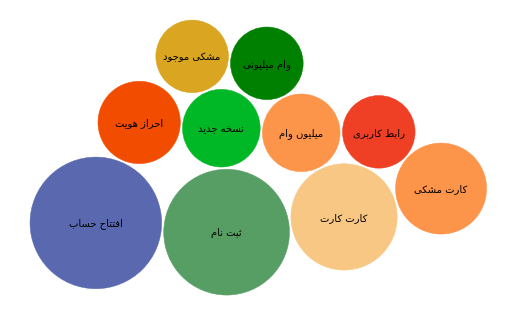

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, list(df2['review'][:10]), color)
ax.set_facecolor("white")
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

In [57]:
bubble_chart = BubbleChart(area=list(df3['count'][:11]),
                           bubble_spacing=0.1)
bubble_chart.collapse()
color= ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral','#F24C00','#FC944A',]

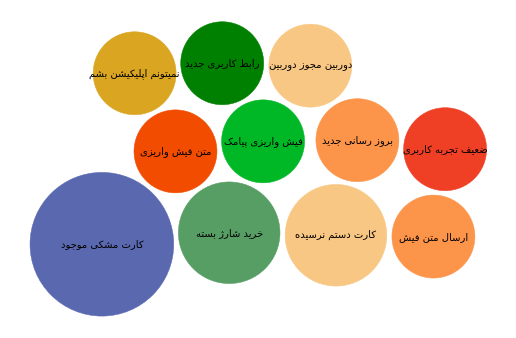

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, list(df3['review'][:11]), color)
ax.set_facecolor("white")
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()